In [37]:
import pandas as pd

In [38]:
df_netflix = pd.read_csv('C:/Users/thai/Downloads/reprograma/on33-python-s14-analise-de-dados/material/dados/netflix.csv')
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [39]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [40]:
df_netflix.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [41]:
df_netflix.duplicated().sum()

np.int64(0)

In [42]:
#conventendo o tipo de dados para data

df_netflix["Join Date"] = pd.to_datetime(df_netflix["Join Date"], format="%d-%m-%y")
df_netflix["Last Payment Date"] = pd.to_datetime(df_netflix["Last Payment Date"], format="%d-%m-%y")

In [43]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [44]:
df_netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [45]:
df_netflix.describe()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age
count,2500.00000,2500.000000,2500,2500,2500.000000
mean,1250.50000,12.508400,2022-08-28 18:02:52.800000,2023-07-03 08:54:31.680000,38.795600
min,1.00000,10.000000,2021-09-05 00:00:00,2023-06-10 00:00:00,26.000000
25%,625.75000,11.000000,2022-07-15 00:00:00,2023-06-29 00:00:00,32.000000
50%,1250.50000,12.000000,2022-08-31 00:00:00,2023-07-03 00:00:00,39.000000
75%,1875.25000,14.000000,2022-10-17 00:00:00,2023-07-08 00:00:00,45.000000
max,2500.00000,15.000000,2023-06-14 00:00:00,2023-07-15 00:00:00,51.000000
std,721.83216,1.686851,NaN,NaN,7.171778


In [46]:
df_netflix["Subscription Type"].nunique()

3

In [47]:
df_netflix["Subscription Type"].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [48]:
df_netflix.describe(include="all")

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
count,2500.00000,2500,2500.000000,2500,2500,2500,2500.000000,2500,2500,2500
unique,NaN,3,NaN,NaN,NaN,10,NaN,2,4,1
top,NaN,Basic,NaN,NaN,NaN,United States,NaN,Female,Laptop,1 Month
freq,NaN,999,NaN,NaN,NaN,451,NaN,1257,636,2500
mean,1250.50000,NaN,12.508400,2022-08-28 18:02:52.800000,2023-07-03 08:54:31.680000,NaN,38.795600,NaN,NaN,NaN
min,1.00000,NaN,10.000000,2021-09-05 00:00:00,2023-06-10 00:00:00,NaN,26.000000,NaN,NaN,NaN
25%,625.75000,NaN,11.000000,2022-07-15 00:00:00,2023-06-29 00:00:00,NaN,32.000000,NaN,NaN,NaN
50%,1250.50000,NaN,12.000000,2022-08-31 00:00:00,2023-07-03 00:00:00,NaN,39.000000,NaN,NaN,NaN
75%,1875.25000,NaN,14.000000,2022-10-17 00:00:00,2023-07-08 00:00:00,NaN,45.000000,NaN,NaN,NaN
max,2500.00000,NaN,15.000000,2023-06-14 00:00:00,2023-07-15 00:00:00,NaN,51.000000,NaN,NaN,NaN


In [54]:
df_netflix["duracao_assinatura"] = df_netflix["Last Payment Date"] - df_netflix["Join Date"]
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511 days
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655 days
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119 days
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351 days
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58 days
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352 days
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344 days
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340 days
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334 days


In [55]:
df_netflix["duracao_assinatura"] = df_netflix["duracao_assinatura"].dt.days
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334


In [57]:
df_netflix.dtypes

User ID                        int64
Subscription Type             object
Monthly Revenue                int64
Join Date             datetime64[ns]
Last Payment Date     datetime64[ns]
Country                       object
Age                            int64
Gender                        object
Device                        object
Plan Duration                 object
duracao_assinatura             int64
dtype: object

In [58]:
df_netflix.describe()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,duracao_assinatura
count,2500.00000,2500.000000,2500,2500,2500.000000,2500.000000
mean,1250.50000,12.508400,2022-08-28 18:02:52.800000,2023-07-03 08:54:31.680000,38.795600,308.619200
min,1.00000,10.000000,2021-09-05 00:00:00,2023-06-10 00:00:00,26.000000,8.000000
25%,625.75000,11.000000,2022-07-15 00:00:00,2023-06-29 00:00:00,32.000000,261.000000
50%,1250.50000,12.000000,2022-08-31 00:00:00,2023-07-03 00:00:00,39.000000,307.000000
75%,1875.25000,14.000000,2022-10-17 00:00:00,2023-07-08 00:00:00,45.000000,356.000000
max,2500.00000,15.000000,2023-06-14 00:00:00,2023-07-15 00:00:00,51.000000,655.000000
std,721.83216,1.686851,NaN,NaN,7.171778,63.088172


In [59]:
df_netflix.min()

User ID                                 1
Subscription Type                   Basic
Monthly Revenue                        10
Join Date             2021-09-05 00:00:00
Last Payment Date     2023-06-10 00:00:00
Country                         Australia
Age                                    26
Gender                             Female
Device                             Laptop
Plan Duration                     1 Month
duracao_assinatura                      8
dtype: object

In [60]:
df_netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58


In [64]:
df_netflix["dt_mes"] = df_netflix["Join Date"].dt.month
df_netflix["dt_mes"] = df_netflix["Join Date"].dt.year
df_netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura,dt_mes
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,2022
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,2021
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,2023
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,2022
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2023


In [65]:
df_netflix.dt_mes.value_counts()

dt_mes
2022    2448
2023      38
2021      14
Name: count, dtype: int64

In [68]:
df_netflix["Subscription Type"].value_counts(normalize=True)*100

Subscription Type
Basic       39.96
Standard    30.72
Premium     29.32
Name: proportion, dtype: float64

In [71]:
df_netflix.iloc[0:5, 7]

0      Male
1    Female
2      Male
3    Female
4      Male
Name: Gender, dtype: object

In [72]:
df_netflix.loc[df_netflix['Age'] < 25, 'grupo_idade'] = '20-24'
df_netflix.loc[(df_netflix['Age'] >= 25) & (df_netflix['Age'] < 30), 'grupo_idade'] = '25-29'
df_netflix.loc[(df_netflix['Age'] >= 30) & (df_netflix['Age'] < 35), 'grupo_idade'] = '30-34'
df_netflix.loc[(df_netflix['Age'] >= 35) & (df_netflix['Age'] < 40), 'grupo_idade'] = '35-39'
df_netflix.loc[(df_netflix['Age'] >= 40) & (df_netflix['Age'] < 45), 'grupo_idade'] = '40-44'
df_netflix.loc[(df_netflix['Age'] >= 45) & (df_netflix['Age'] < 50), 'grupo_idade'] = '45-49'
df_netflix.loc[(df_netflix['Age'] >= 50) & (df_netflix['Age'] < 55), 'grupo_idade'] = '50-54'
df_netflix.loc[(df_netflix['Age'] >= 55) & (df_netflix['Age'] < 60), 'grupo_idade'] = '55-59'
df_netflix.loc[df_netflix['Age'] >= 60, 'grupo_idade'] = '60+'
df_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,duracao_assinatura,dt_mes,grupo_idade
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,2022,25-29
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,2021,35-39
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,2023,40-44
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,2022,50-54
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2023,30-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352,2022,25-29
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344,2022,30-34
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340,2022,35-39
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334,2022,45-49


In [74]:
df_netflix.grupo_idade.value_counts(normalize=True)*100

grupo_idade
35-39    20.64
30-34    20.16
40-44    19.96
45-49    19.88
25-29    12.28
50-54     7.08
Name: proportion, dtype: float64

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

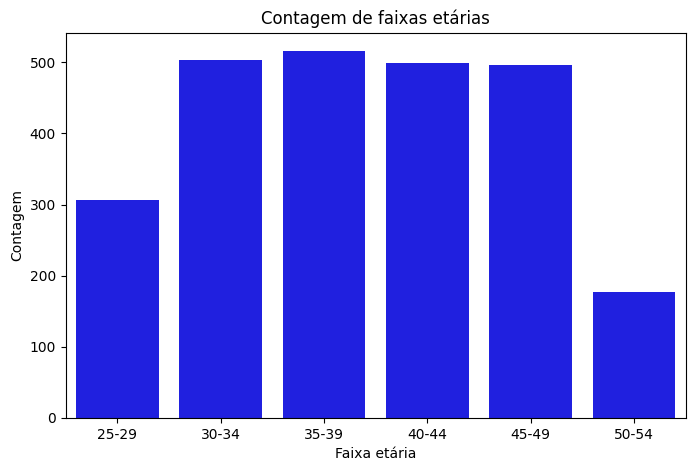

In [76]:
plt.figure(figsize=(8, 5))

sns.countplot(data = df_netflix.sort_values('grupo_idade'),
              x = 'grupo_idade', 
              color = 'blue')
plt.title('Contagem de faixas etárias')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')
plt.show()

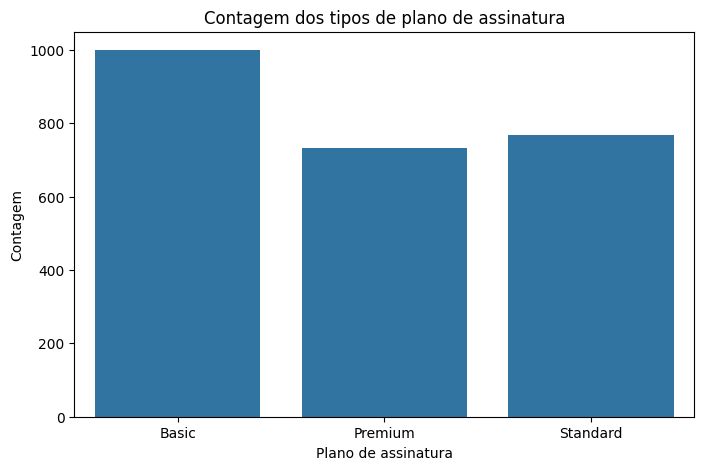

In [77]:
plt.figure(figsize=(8, 5))


sns.countplot(data = df_netflix,
              x = 'Subscription Type')

plt.title('Contagem dos tipos de plano de assinatura')
plt.xlabel('Plano de assinatura')
plt.ylabel('Contagem')

plt.show()

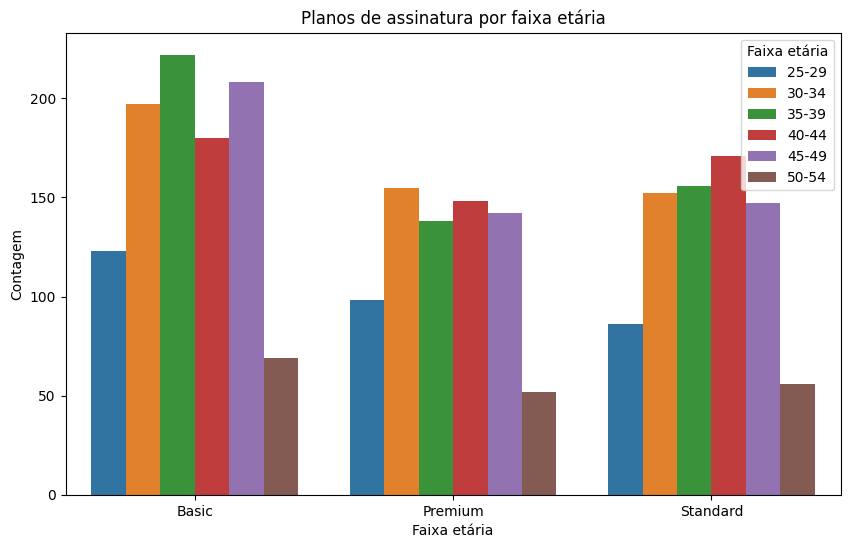

In [78]:

plt.figure(figsize=(10, 6))

sns.countplot(data = df_netflix.sort_values('grupo_idade'),
              x = 'Subscription Type',
              hue = 'grupo_idade')


plt.title('Planos de assinatura por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')

plt.legend(title = 'Faixa etária')

plt.show()

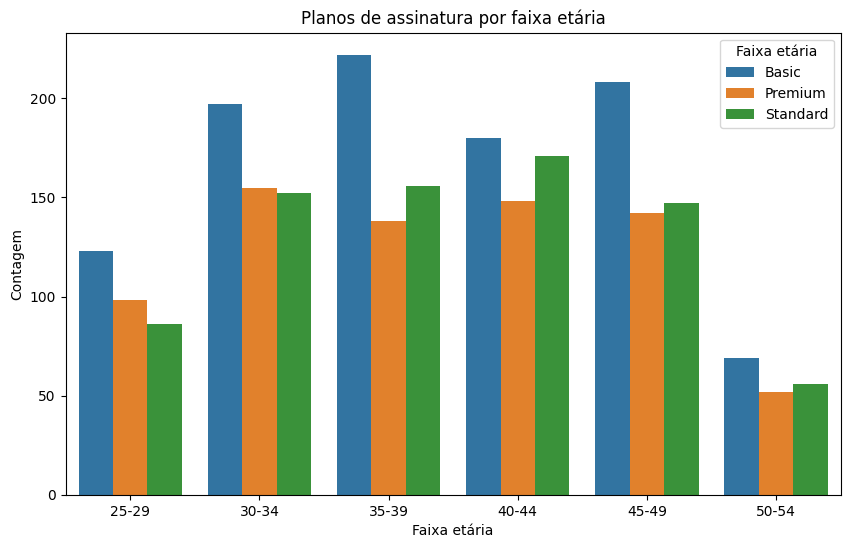

In [79]:

plt.figure(figsize=(10, 6))

sns.countplot(data = df_netflix.sort_values('grupo_idade'),
              hue = 'Subscription Type',
              x = 'grupo_idade')



plt.title('Planos de assinatura por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Contagem')

plt.legend(title = 'Faixa etária')

plt.show()